<a href="https://colab.research.google.com/github/HACP/GameOfLife/blob/main/GameOfLife_20210710_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pylab as plt
from IPython import display
import time

In [2]:
N = 10

In [3]:
#m = np.zeros((N,N))
m = np.random.choice([0,1],size = (N,N))

In [4]:
height, width = m.shape

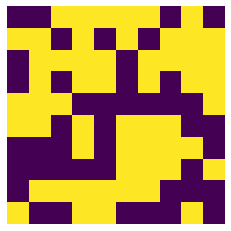

In [5]:
plt.imshow(m)
plt.axis('off')
plt.show()

In [6]:
def get_score_neighbors(conf, i, j):
    return int((conf[(i+0)%N][(j-1)%N] +0*conf[(i+0)%N][(j+0)%N] + conf[(i+0)%N][(j+1)%N] + 
                conf[(i+1)%N][(j-1)%N] +  conf[(i+1)%N][(j+0)%N] + conf[(i+1)%N][(j+1)%N] + 
                conf[(i-1)%N][(j-1)%N] +  conf[(i-1)%N][(j+0)%N] + conf[(i-1)%N][(j+1)%N] ))

In [7]:
get_score_neighbors(m,0,0)

4

In [8]:
def update_conf(conf):
    conf_next = conf.copy()
    for jj in range(width):
        for ii in range(height):
            score = get_score_neighbors(conf, ii,jj)
            
            if conf[ii][jj] == 1.:
                if (score < 2) or (score > 3):
                    conf_next[ii][jj] = 0.
            else:
                if score == 3.:
                    conf_next[ii][jj] = 1.
            
    return(conf_next,sum(sum(abs(conf_next - conf))))

In [9]:
m_next, delta = update_conf(m)

In [10]:
delta

56

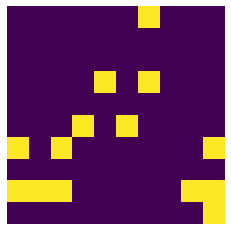

In [11]:
plt.imshow(m_next)
plt.axis('off')
plt.show()

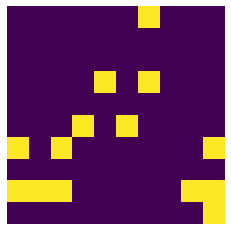

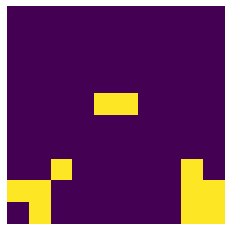

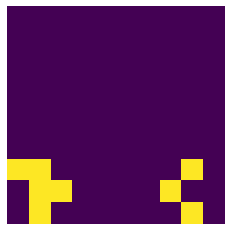

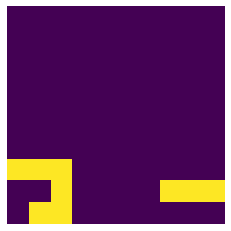

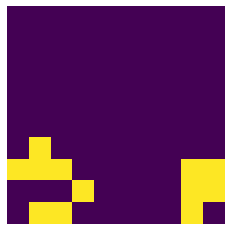

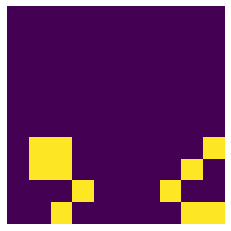

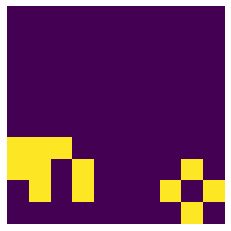

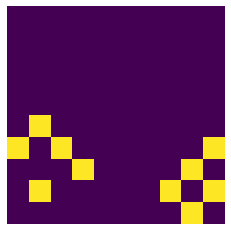

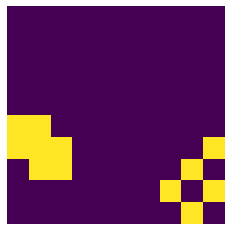

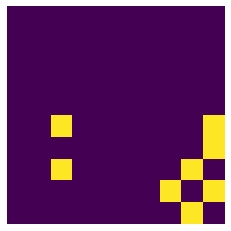

In [12]:
m_next = m.copy()
for _ in range(10):
  m_next, delta = update_conf(m_next)
  plt.close()
  plt.figure()
  plt.imshow(m_next)
  plt.axis('off')
  plt.show()

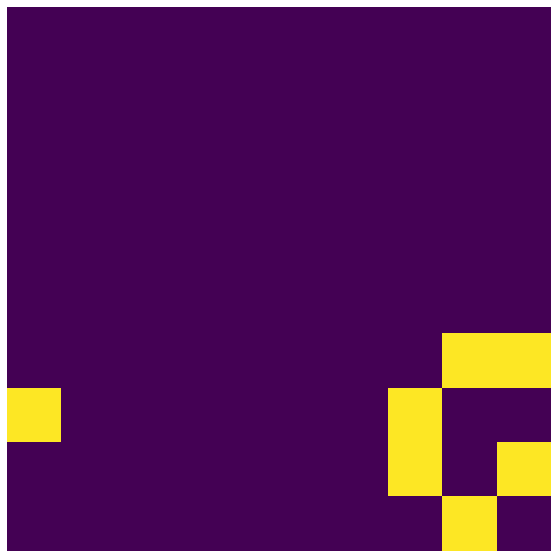

In [13]:
m_next = m.copy()
delta = 1
fig = plt.figure(figsize=(10,10))
for i in range(100):
    while sum(sum(m_next))>0 and delta > 0:
      plt.imshow(m_next)
      plt.axis('off')
      m_next, delta = update_conf(m_next)
      display.clear_output(wait=True)
      display.display(plt.gcf())
      time.sleep(0.1)

display.clear_output(wait=True)
plt.imshow(m_next)
plt.axis('off')
plt.show()